In [1]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

np.set_printoptions(legacy='1.25')

fig_directory = '../../Note/Notes/Figures/03_rdn_net/'

## Edros-Renyi random graph

### Degree distribution

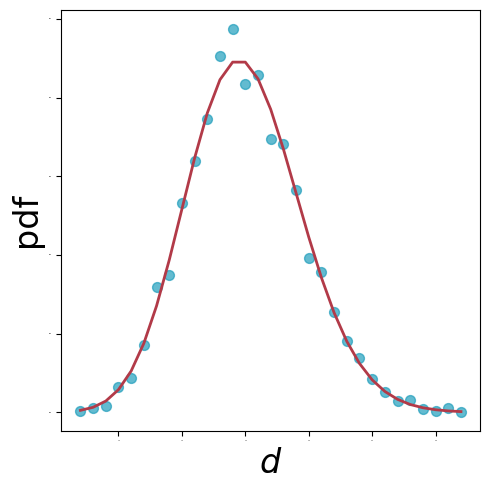

In [70]:
# Generate an instance of the ER random graph
n = 5000  # Number of nodes
p = 20/n  # Connection probability
g = nx.erdos_renyi_graph(n, p)

# Compute the degree distribution
degree_counts = Counter(dict(g.degree()).values())

# Normalize the distribution
degree_probabilities = {k: v/n for k, v in degree_counts.items()}

# Theoretical binomial distribution
degree_range = np.arange(min(degree_counts.keys()), max(degree_counts.keys()) + 1)
binomial_pmf = [binom.pmf(k, n - 1, p) for k in degree_range]


fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.plot(degree_range, binomial_pmf, color = '#b23a48', linewidth = 2)
ax.scatter(degree_probabilities.keys(), degree_probabilities.values(), s = 50, color = '#219ebc', alpha = 0.7)
ax.set_xlabel(r'$d$', fontsize = 24)
ax.set_ylabel('pdf', fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize = 0)

plt.tight_layout()
plt.savefig(f'{fig_directory}poisson.pdf', bbox_inches = 'tight', dpi = 400)

plt.show();

### Global clustering coefficient

In [71]:
print(f'Global clustering coefficient: {nx.transitivity(g)}')
print(f'p: {p}')

Global clustering coefficient: 0.004121320303330775
p: 0.004


## Emergence of a giant component

In [12]:
n = 5000
S = []
dv = np.linspace(0.1, 3, 15)

for i, d in enumerate(dv):
    print(f'i: {i+1}/{len(dv)}', end = '\r')
    g = nx.erdos_renyi_graph(n,d/n)
    S.append(len(max(nx.connected_components(g), key = len))/n)

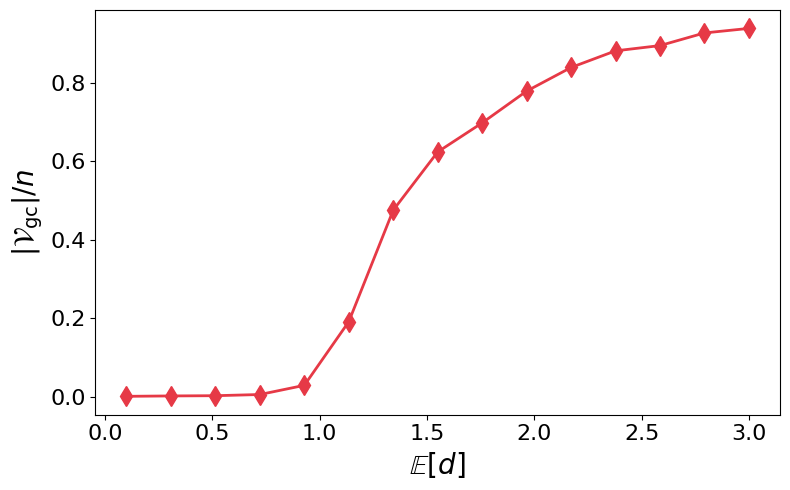

In [26]:
fig, ax = plt.subplots(1,1, figsize = (8,5))
ax.plot(dv, S, color = '#e63946', linewidth = 2, markersize = 10, marker = 'd')
ax.set_xlabel(r'$\mathbb{E}[d]$', fontsize = 20)
ax.set_ylabel(r'$|\mathcal{V}_{\rm gc}|/n$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 16)


plt.tight_layout()
plt.savefig(f'{fig_directory}percolation.pdf', bbox_inches = 'tight', dpi = 400)

plt.show();


## Configuration model

In [77]:
n = 5000

# generate a vector theta (we use the exponential distribution in this case)
theta = np.random.exponential(scale = 20, size = n)
theta = theta/np.mean(theta)

# set the average degree
deg = 10

# generate the graph
g = nx.expected_degree_graph(theta*deg)

### Degree distribution

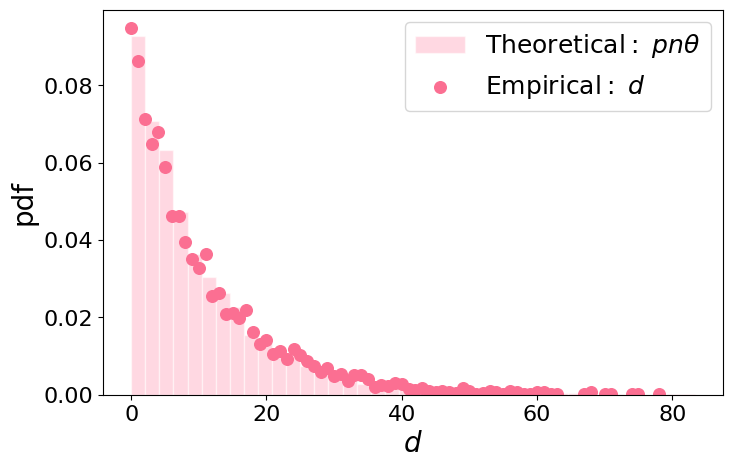

The average degree is 10.0808


In [78]:
fig, ax = plt.subplots(1,1, figsize = (8,5))
deg_dict = Counter(dict(g.degree()).values())

ax.hist(theta*deg, density = True, bins = 40, alpha = 0.5, edgecolor = 'white', label = r'${\rm Theoretical:~}pn\theta$', color = '#ffb3c6')
ax.scatter(deg_dict.keys(), np.array(list(deg_dict.values()))/n, s = 70, label = r'${\rm Empirical:}~d$', color = '#fb6f92')
ax.legend(fontsize = 18)
ax.set_xlabel(r'$d$', fontsize = 20)
ax.set_ylabel(r'pdf', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 16)
plt.show();

print(f'The average degree is {2*len(g.edges)/n}')

### Global clustering coefficient

In [79]:
print(f'Global clustering coefficient: {nx.transitivity(g)}')
phi = np.mean(theta**2)
print(f'p: {p*phi}')

Global clustering coefficient: 0.0079816682160261
p: 0.008029467444847734


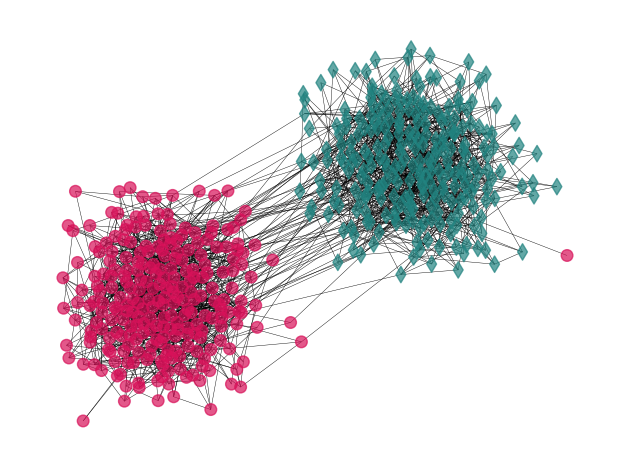

In [120]:
n = 500
sizes = [int(n/2), int(n/2)]
c_in, c_out = 15., .5
probs = [[c_in/n, c_out/n], [c_out/n, c_in/n]]
label = np.zeros(n)
label[int(n/2):] = 1
label = label.astype(int)

g = nx.stochastic_block_model(sizes, probs)
GC = list(max(nx.connected_components(g), key = len))
g_ = nx.subgraph(g, max(nx.connected_components(g), key = len))


colors_ = ["d81159","218380"]
shapes_ = ['o', 'd']
colors_ = [f'#{v}' for v in colors_]
colors = np.array([colors_[label[i]] for i in range(n)])
colors = colors[GC]

shapes = np.array([shapes_[label[i]] for i in range(n)])
shapes = shapes[GC]

# Get node positions for plotting
pos = nx.spring_layout(g_)

# Draw edges first
nx.draw_networkx_edges(g_, pos, edge_color='k', width=0.3, style='-')

for shape in set(shapes):
    nx.draw_networkx_nodes(
        g_, 
        pos, 
        nodelist=[node for node, s in zip(g.nodes(), shapes) if s == shape],
        node_color=[colors[i] for i in range(len(colors)) if shapes[i] == shape],
        node_size=70,
        node_shape=shape,
        alpha=0.7
    )

plt.axis('off')
plt.tight_layout()
# plt.savefig(f'{fig_directory}sbm.pdf', bbox_inches = 'tight', dpi = 400)
plt.show();

In [121]:
partition = [set(np.where(label == i)[0]) for i in np.unique(label)]
print(f'Modularity: {nx.algorithms.community.modularity(g, partition)}')
c = (c_in + c_out)/2

print(f'Expected modularity: {(c_in/c - 1)/2}')

Modularity: 0.46533329897704145
Expected modularity: 0.467741935483871


## Barabasi-Albert

In [2]:
# generate the graph
n, m = 15000, 5
g = nx.barabasi_albert_graph(n,m)

### Degree distribution

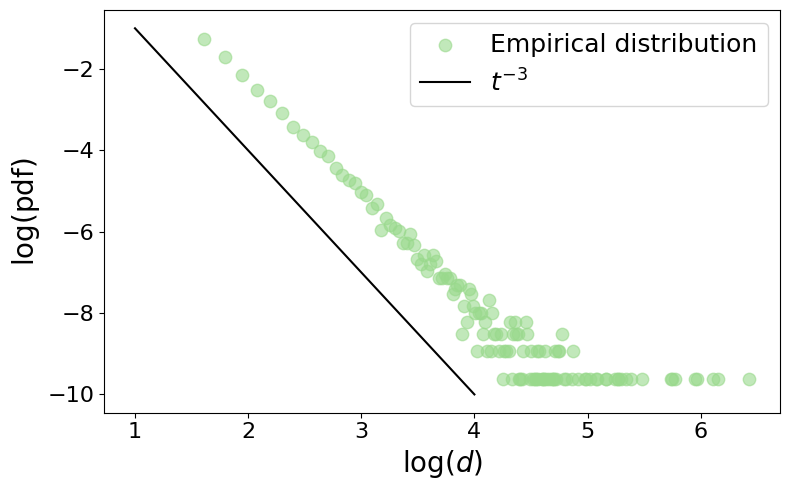

In [3]:
d = list(dict(g.degree()).values())
d_counts = Counter(d)

fig, ax = plt.subplots(1,1, figsize = (8,5))
ax.scatter(np.log(np.array(list(d_counts.keys()))), np.log(np.array(list(d_counts.values()))/n), s = 80, color = '#99d98c', alpha = 0.6, label = 'Empirical distribution')
ax.plot(np.arange(1,5), -3*np.arange(1,5)+2, color = 'k', label = r'$t^{-3}$')
ax.set_xlabel(r'${\rm log}(d)$', fontsize = 20)
ax.set_ylabel(r'${\rm log}({\rm pdf})$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 16)
ax.legend(fontsize = 18)

plt.tight_layout()
plt.savefig(f'{fig_directory}BA.pdf', bbox_inches = 'tight', dpi = 400)
plt.show();


### Clustering coefficient

In [11]:
nv = np.linspace(10**3, 10**5, 10)
C = []

for n in nv:
    g = nx.barabasi_albert_graph(n, m)
    C.append(nx.transitivity(g))

C = np.array(C)

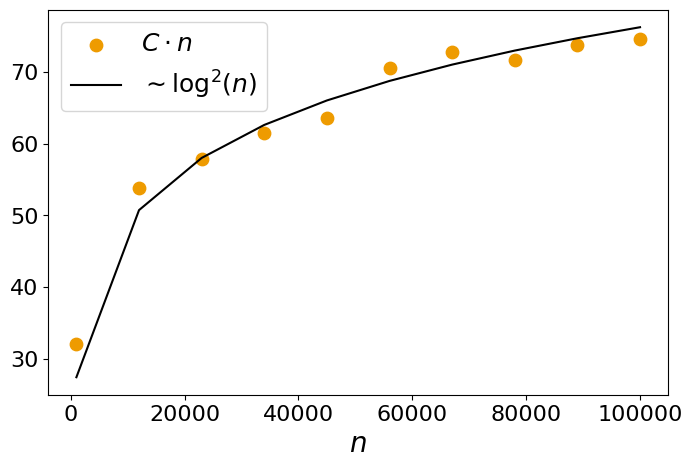

In [12]:
# fit the multiplicative constant
a = np.mean(C*nv*np.log(nv)**2)/np.mean(np.log(nv)**4)

fig, ax = plt.subplots(1,1, figsize = (8,5))

ax.scatter(nv, C*nv, color = '#ee9b00', s = 80, label = r'$C\cdot n$')
ax.plot(nv, a*np.log(nv)**2, color = 'k', label = r'$\sim {\rm log}^2(n)$')

ax.set_xlabel(r'$n$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 16)
ax.legend(fontsize = 18)

plt.show();

## Watt-Strogatz

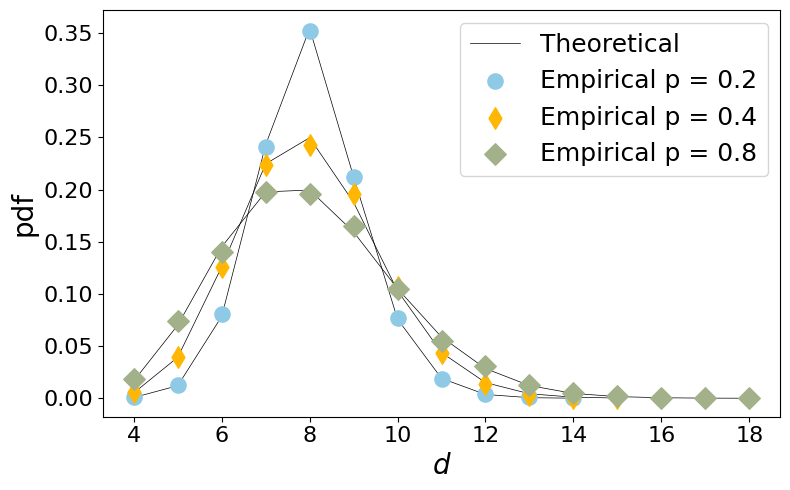

In [129]:
# function to compute the degree distribution at each point d
def WS_def_distr(d, k, p):
    S = 0
    for m in range(np.min([k, d-k])+1):
        S += binom.pmf(m, k, 1-p)*binom.pmf(d-k-m, (n-1)*k, p/(n-1))

    return S

n, k = 15000, 4

pv = [0.2, 0.4, 0.8]
colors = ['#8ecae6', '#ffb703', '#a3b18a']
markers = ['o', 'd', 'D']

fig, ax = plt.subplots(1,1, figsize = (8,5))

for i, p in enumerate(pv):
    g = nx.watts_strogatz_graph(n, 2*k, p)

    deg_dict = Counter(list(dict(g.degree()).values()))
    dv = np.sort(list(deg_dict.keys()))

    if i == 0:
        ax.plot(dv, [WS_def_distr(d, k, p) for d in dv], zorder = 0, color = 'k', linewidth = 0.5, label = 'Theoretical')
    else:
        ax.plot(dv, [WS_def_distr(d, k, p) for d in dv], zorder = 0, color = 'k', linewidth = 0.5)
    ax.scatter(deg_dict.keys(), np.array(list(deg_dict.values()))/n, s = 120, color = colors[i], zorder = 1, label = f'Empirical p = {p}', marker = markers[i])
    ax.set_xlabel(r'$d$', fontsize = 20)
    ax.set_ylabel('pdf', fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize = 16)
    ax.legend(fontsize = 18)
plt.tight_layout()

plt.savefig(f'{fig_directory}WS_deg.pdf', bbox_inches = 'tight', dpi = 400)
plt.show();

## Clustering coefficient and APL

In [ ]:
n, k = 1000, 3

pv = np.logspace(-4, 0, 25)
p = pv[0]

n_average = 10
L, C = [[] for i in range(n_average)], [[] for i in range(n_average)]

for i, p in enumerate(pv):
    print(f'{i+1}/{len(pv)}', end = '\r')
    for j in range(n_average):
        g = nx.watts_strogatz_graph(n, 2*k, p)
        L[j].append(nx.average_shortest_path_length(g))
        C[j].append(nx.transitivity(g))

L, C = np.array(L), np.array(C)
L_ = np.mean(L, axis = 0)
C_ = np.mean(C, axis = 0)

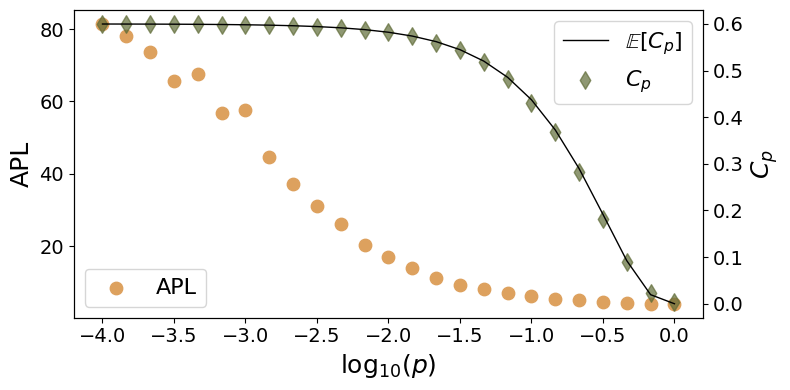

In [61]:
fig, ax1 = plt.subplots(1,1, figsize = (8, 4))

ax1.scatter(np.log10(pv), L_, color = '#dda15e', s = 80, label = 'APL')
ax1.set_xlabel(r'${\rm log}_{10}(p)$', fontsize = 18)
ax1.set_ylabel('APL', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize = 14)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.plot(np.log10(pv), 3/2*(k-1)/(2*k-1)*(1-pv)**3, color = 'k', linewidth = 1, label = r'$\mathbb{E}[C_p]$')
ax2.scatter(np.log10(pv), C_, color = '#606c38', s = 80, marker = 'd', alpha = 0.7, label = r'$C_p$')
ax2.set_ylabel(r'$C_p$', fontsize = 18)
ax2.tick_params(axis='both', which='major', labelsize = 14)

ax1.legend(loc = 3, fontsize = 16)
ax2.legend(loc = 1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'{fig_directory}WS_APL_C.pdf', bbox_inches = 'tight', dpi = 400)
plt.show();